### INTEGER PROGRAMMING MODEL FOR A SOLAR PANEL MANUFACTURER SEEKING A COST EFFECTIVE DISTRIBUTION NETWORK 

In [ ]:
#========================================
# libraries used in mode 
#========================================

import folium as fl # allows creating geogeografic maps
import random as rm # random numbers to create data
import pandas as pd # dataframes
from pulp import * # IP, LP or MIP optimization models

### MAP WITH AVAILABLE WAREHOUSES (ORIGIN NODES) IN THE NETWORK

In [4]:
#------------------------------------------------
# Folium map takes two arguments 
# * location: --> [latitude, longitude]
# * zoom
# * I obtained the location latitude and longitude
# from https://www.latlong.net/
#------------------------------------------------
map = fl.Map(location=[40.964863,-104.775263], zoom_start=5)
fl.Marker(location=[33.830302, -116.546843], popup="Palms Springs, CA").add_to(map)
fl.Marker(location=[38.581573, -121.494400], popup="Sacramento, CA").add_to(map)
fl.Marker(location=[29.759935, -95.364238], popup="Huston, TX").add_to(map)
fl.Marker(location=[41.588821, -93.620308], popup="Des Moines, IO").add_to(map)
fl.Marker(location=[33.748997, -84.387985], popup="Atlanta, GA").add_to(map)
fl.Marker(location=[39.952583, -75.165222], popup="Philadelphia, PA").add_to(map)
map

In [5]:
warehouses = ['Palm Springs','Sacramento','Huston','Atlanta','Des Moines','Philadelpia']
customers = ['Chicago','St George','Gary','Madison','Buffalo','Tampa','New Orleans','Denver','Phoemix','New Milford']

<Axes: title={'center': 'Customer Demand'}, xlabel='Customer'>

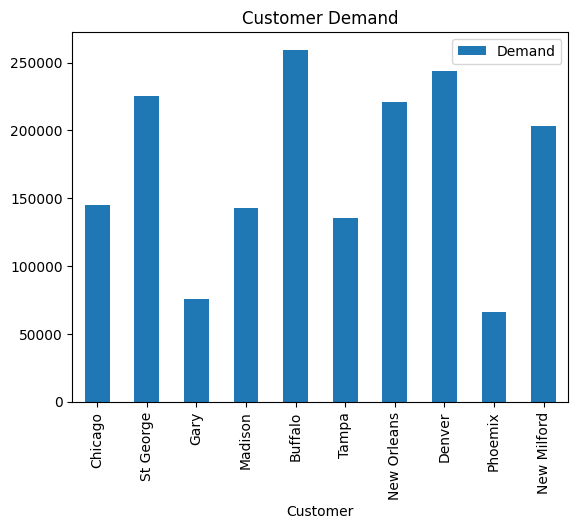

In [6]:
#=====================================================
# generating random numbers to simulate monthy demand
#=====================================================
n = 10 
demand = rm.sample(range(50000,300000), n)
customer_demand = dict(zip(customers, demand))
customer_demand_dataframe = pd.DataFrame(list(customer_demand.items()), columns=['Customer', 'Demand'])
customer_demand_dataframe.plot(kind='bar', x='Customer', y='Demand', title='Customer Demand')


In [7]:
customer_demand_dataframe['Demand'].describe()

count        10.000000
mean     171824.900000
std       68733.921718
min       65987.000000
25%      137012.500000
50%      174215.500000
75%      224641.000000
max      259608.000000
Name: Demand, dtype: float64

In [8]:
n_p=60

In [9]:
shipping_prices = rm.choices(range(70,95), k=n_p)
key = [(w,c) for w in warehouses for c in customers]
cost_dict = dict(zip(key, shipping_prices))
cost_dict

{('Palm Springs', 'Chicago'): 84,
 ('Palm Springs', 'St George'): 72,
 ('Palm Springs', 'Gary'): 81,
 ('Palm Springs', 'Madison'): 80,
 ('Palm Springs', 'Buffalo'): 91,
 ('Palm Springs', 'Tampa'): 94,
 ('Palm Springs', 'New Orleans'): 71,
 ('Palm Springs', 'Denver'): 71,
 ('Palm Springs', 'Phoemix'): 80,
 ('Palm Springs', 'New Milford'): 92,
 ('Sacramento', 'Chicago'): 73,
 ('Sacramento', 'St George'): 90,
 ('Sacramento', 'Gary'): 83,
 ('Sacramento', 'Madison'): 80,
 ('Sacramento', 'Buffalo'): 84,
 ('Sacramento', 'Tampa'): 76,
 ('Sacramento', 'New Orleans'): 80,
 ('Sacramento', 'Denver'): 71,
 ('Sacramento', 'Phoemix'): 77,
 ('Sacramento', 'New Milford'): 74,
 ('Huston', 'Chicago'): 77,
 ('Huston', 'St George'): 79,
 ('Huston', 'Gary'): 86,
 ('Huston', 'Madison'): 82,
 ('Huston', 'Buffalo'): 92,
 ('Huston', 'Tampa'): 89,
 ('Huston', 'New Orleans'): 71,
 ('Huston', 'Denver'): 87,
 ('Huston', 'Phoemix'): 92,
 ('Huston', 'New Milford'): 87,
 ('Atlanta', 'Chicago'): 88,
 ('Atlanta', 'St Ge

In [10]:

# Initialize Model
model = LpProblem("Minimize Shipping Costs", LpMinimize)

/workspaces/supply_chain_optimization_models/.conda/lib/python3.12/site-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [11]:
# Define decision variables
key = [(w, c) for w in warehouses for c in customers]
var_dict = LpVariable.dicts('num_of_shipments', 
                            key, 
                            lowBound=0, cat='Integer')

In [12]:
model += lpSum([cost_dict[(w, c)] * var_dict[(w, c)] 
                for w in warehouses for c in customers])

In [13]:
for c in customers:
    model += lpSum([var_dict[(w,c)] for w in warehouses]) == customer_demand[c]

In [14]:
customer_demand

{'Chicago': 144957,
 'St George': 225748,
 'Gary': 75951,
 'Madison': 142531,
 'Buffalo': 259608,
 'Tampa': 135173,
 'New Orleans': 221320,
 'Denver': 243500,
 'Phoemix': 65987,
 'New Milford': 203474}

In [15]:
model.solve()

# Print the Model Status
print("Model Status: {}".format(LpStatus[model.status]))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /workspaces/supply_chain_optimization_models/.conda/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/99a8a90584424bb4bab19c045dd0ef9d-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/99a8a90584424bb4bab19c045dd0ef9d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 256 RHS
At line 267 BOUNDS
At line 328 ENDATA
Problem MODEL has 10 rows, 60 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1.23471e+08 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 1.23471e+08 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cut

In [16]:
# Print the Decision Variables
for v in model.variables():
    print(v.name, "=", v.varValue)

num_of_shipments_('Atlanta',_'Buffalo') = 0.0
num_of_shipments_('Atlanta',_'Chicago') = 0.0
num_of_shipments_('Atlanta',_'Denver') = 0.0
num_of_shipments_('Atlanta',_'Gary') = 0.0
num_of_shipments_('Atlanta',_'Madison') = 0.0
num_of_shipments_('Atlanta',_'New_Milford') = 203474.0
num_of_shipments_('Atlanta',_'New_Orleans') = 0.0
num_of_shipments_('Atlanta',_'Phoemix') = 0.0
num_of_shipments_('Atlanta',_'St_George') = 0.0
num_of_shipments_('Atlanta',_'Tampa') = 0.0
num_of_shipments_('Des_Moines',_'Buffalo') = 259608.0
num_of_shipments_('Des_Moines',_'Chicago') = 0.0
num_of_shipments_('Des_Moines',_'Denver') = 0.0
num_of_shipments_('Des_Moines',_'Gary') = 75951.0
num_of_shipments_('Des_Moines',_'Madison') = 0.0
num_of_shipments_('Des_Moines',_'New_Milford') = 0.0
num_of_shipments_('Des_Moines',_'New_Orleans') = 221320.0
num_of_shipments_('Des_Moines',_'Phoemix') = 0.0
num_of_shipments_('Des_Moines',_'St_George') = 0.0
num_of_shipments_('Des_Moines',_'Tampa') = 135173.0
num_of_shipments_(

In [17]:
# Print the Objective Value
print("Objective = ", value(model.objective))

Objective =  123471235.0


- shadow price
    - represents changes in total cost associated with a unit increase in demand in a given region
- slack
    - should be = 0

In [18]:
# Print the Constraint Slack
o = [{'name':name, 'shadow price':c.pi,'slack':c.slack} 
     for name, c in model.constraints.items()]
o_df = pd.DataFrame(o)
o_df

,name,shadow price,slack
0,_C1,0.0,-0.0
1,_C2,0.0,-0.0
2,_C3,0.0,-0.0
3,_C4,0.0,-0.0
4,_C5,0.0,-0.0
5,_C6,0.0,-0.0
6,_C7,0.0,-0.0
7,_C8,0.0,-0.0
8,_C9,0.0,-0.0
9,_C10,0.0,-0.0
